Set parameter Username
Academic license - for non-commercial use only - expires 2023-04-24
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 45 rows, 45 columns and 90 nonzeros
Model fingerprint: 0x760d4150
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [4e+00, 4e+00]
Presolve removed 45 rows and 45 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds (0.00 work units)
Optimal objective  0.000000000e+00
C0
inf
C1
4.0
C2
4.0
C3
inf
C4
inf
C5
0.0
C6
inf
C7
4.0
C8
4.0
C9
inf
C10
0.0
C11
inf
C12
inf
C13
inf
C14
4.0
C15
0.0
C16
0.0
C17
0.0
C18
0.0
C19
0.0
C20
0.0
C21
0.0
C22
0.0
C23
0.0
C24
0.0
C25
0.0
C26
0

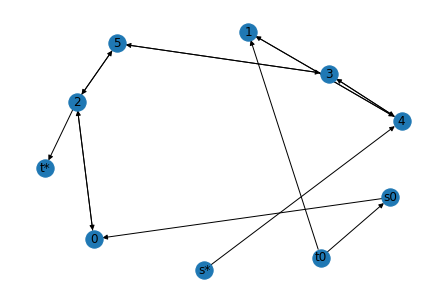

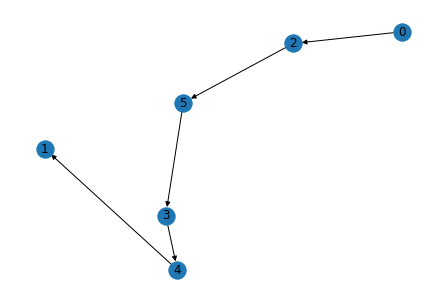

In [1]:
# IMPORT
import sys
import parse_graph_new
import path_enumeration
import pairedbin_enumeration
import networkx as nx
import time
import matplotlib.pyplot as plt
from copy import deepcopy 
import optimize
from flowProblem import writeGStar

# VARIABLES
start = time.time()
no_trans = 0
#gene_id = 0
#file_gtf = open("transcripts.gtf", "w") 

# MAIN
with open('test1.graph') as f:
    fileEndReached = False
    f.readline() #skip ---- seperator line
    while not fileEndReached:
        
        # READ META AND BIN DATA FROM FILE
        f.readline() #skip ==META 
        Chromosome, Strand, Exons = parse_graph_new.parse_meta(f)
        Bins = parse_graph_new.parse_bins(f)
        PairedBins = parse_graph_new.parse_pairs(f)
        PairedBins_copy = deepcopy(PairedBins)

        # BUILD GRAPH
        G_full = nx.DiGraph()
        fileEndReached, skip = parse_graph_new.parse_graph(f, G_full, Exons)

        if not fileEndReached and not skip:
            G_clean = nx.DiGraph()
            fileEndReached, _ = parse_graph_new.parse_graph(f, G_clean, Exons)
            # nx.draw_networkx(G_clean, with_labels=True, arrowsize=12)
            # plt.show()
        if skip:
            G_clean = G_full

        transcripts = []
        g_Star = writeGStar(G_full)
        plt.figure(1)
        nx.draw(g_Star, with_labels=True)
        plt.figure(2)
        nx.draw(G_full, with_labels=True)
        # FULL PATH ENUMERATION
        """
        transcripts = path_enumeration.enumeration(G_full,[],"0",["0"],"1",True)
        no_trans = no_trans + len(transcripts)
        """
        
        # MULTI BIN ENUMERATION
        """
        multi_bins = path_enumeration.get_multibins(Bins)
        transcripts = path_enumeration.enumeration_bins2(G_clean,[],"0",["0"],[],multi_bins,"1",True)
        no_trans = no_trans + len(transcripts)
        """
        
        # PAIRED BIN ENUMERATION 1
        """
        multi_bins = path_enumeration.get_multibins(Bins)
        paired_bins = pairedbin_enumeration.get_pairedbins(G_clean,PairedBins_copy,multi_bins)
        transcripts = path_enumeration.enumeration_bins2(G_clean,[],"0",["0"],[],paired_bins+multi_bins,"1",True)
        no_trans = no_trans + len(transcripts)
        """
        
        # PAIRED BIN ENUMERATION 2
        """
        pairedbins_grouped = pairedbin_enumeration.group_pairs(PairedBins_copy)
        multi_bins = path_enumeration.get_multibins(Bins)
        transcripts = path_enumeration.enumeration_bins2(G_clean,[],"0",["0"],[],multi_bins,"1",True)
        transcripts_copy = deepcopy(transcripts)
        filtered_transcripts = pairedbin_enumeration.filter_transcripts(transcripts_copy,pairedbins_grouped)
        no_trans = no_trans + len(filtered_transcripts)
        """
        
        # ADD TRANSCRIPTS TO GTF FILE
        """
        gene_id += 1
        transcript_id = 0
        for transcript in transcripts:
            transcript_id += 1
            parse_graph_new.write_valid_gtf_entry(file_gtf,Chromosome,Strand,Exons,transcript,"Gene"+str(gene_id),"Transcript"+str(transcript_id))
        """
    
        # Optimization 
        """
        transcripts = path_enumeration.enumeration(G_clean, [], "0", ["0"], "1", False)
        print(optimize.model(G_clean, transcripts))
        #get dictionary with expression levels (F=(f1,f2,f3,...fN))
        var_dict = optimize.model(G_clean, transcripts)
        """


    # PRINT RESULTS  
    end = time.time()
    print("Gesamtanzahl Transkripte: ", no_trans)
    print('{:5.3f}s'.format(end-start))       
    #file_gtf.close()
